In [1]:
import numpy as np
import torch
from torch.autograd import Variable

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Logistic regression in PyTorch

In [62]:
# Generate toy training data
X = np.random.randn(100, 2, 1).squeeze()
y = (6.7 * X[:, 0] + 2.6 * X[:, 1]) > 0

# Convert to tensors
X = Variable(torch.Tensor(X))
y = Variable(torch.Tensor(y.astype(float)))

# Reshape target to match input
y = y.view(100, 1)

In [63]:
# Generate toy test data
X_test = np.random.randn(100, 2, 1).squeeze()
y_test = (6.7 * X_test[:, 0] + 2.6 * X_test[:, 1]) > 0

# Convert to tensors
X_test = Variable(torch.Tensor(X_test))
y_test = Variable(torch.Tensor(y_test.astype(float)))

# Reshape target to match input
y_test = y_test.view(100, 1)

In [64]:
# Define the model class

class Model(torch.nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(2, 1)   # Define in & out size
        
    def forward(self, x):
        return torch.sigmoid(self.linear(x))  # Sigmoid 

In [65]:
# Instatiate the model
log_reg = Model()

In [66]:
# Define optimization and loss
loss_func = torch.nn.BCELoss(reduction = 'mean')              # Binary Cross-Entropy
optimizer = torch.optim.Adam(log_reg.parameters(), lr = 29)   # Adam

In [67]:
# Create a list to capture loss history
history = []

In [68]:
# Define training function
def train_it(x, y, model, n_epochs = 500):
    
    for epoch in range(n_epochs):
        y_pred = model(x)

        loss = loss_func(y_pred, y)
        
        history.append(loss)
        
        if epoch % 50 == 0:
            print(f"Epoch: {epoch:06.2f} | Loss: {loss:10.6f}")

        # Reset gradients, perform backprop, perform optimizer step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [69]:
# Train the model
train_it(X, y, log_reg, n_epochs = 501)

Epoch: 000.00 | Loss:   0.691812
Epoch: 050.00 | Loss:   0.000010
Epoch: 100.00 | Loss:   0.000014
Epoch: 150.00 | Loss:   0.000005
Epoch: 200.00 | Loss:   0.000003
Epoch: 250.00 | Loss:   0.000002
Epoch: 300.00 | Loss:   0.000002
Epoch: 350.00 | Loss:   0.000001
Epoch: 400.00 | Loss:   0.000001
Epoch: 450.00 | Loss:   0.000001
Epoch: 500.00 | Loss:   0.000001


In [70]:
# Predict
y_pred = log_reg(X_test)

In [71]:
# Compute loss of test
loss_func(y_pred, y_test)

tensor(0.0013, grad_fn=<BinaryCrossEntropyBackward>)

In [72]:
# Examine predictions - accuracy
sum((y_pred > .5).numpy() == y_test.numpy()) / len(y_test)

array([1.])

In [73]:
# Well done! :)

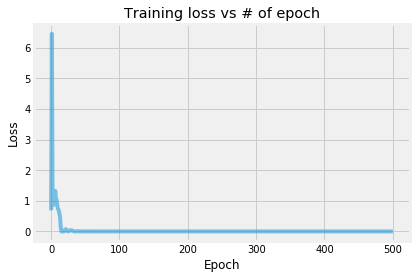

In [74]:
# Plot loss
plt.plot(history, alpha=.5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss vs # of epoch')
plt.show()